In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [26]:
file = "diabetes.csv"
df = pd.read_csv(file)

columns_clean = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']


In [27]:
df[columns_clean] = df[columns_clean].replace(0, np.nan)
df[columns_clean] = df[columns_clean].fillna(df[columns_clean].median())

X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   


In [28]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [30]:
print("First 5 rows of the original data after cleaning:")
print(df.head())

print("\nFirst 5 rows of the scaled training data:")
print(pd.DataFrame(X_train_scaled, columns=X.columns).head())

print("\nFirst 5 rows of the scaled test data:")
print(pd.DataFrame(X_test_scaled, columns=X.columns).head())

First 5 rows of the original data after cleaning:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    125.0  33.6   
1            1     85.0           66.0           29.0    125.0  26.6   
2            8    183.0           64.0           29.0    125.0  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

First 5 rows of the scaled training data:
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.836294 -0.894546      -1.003221      -1.269545 -0.956993 -1.203826   
1     0.390728 -0.562477      -0.019090       0.029693

In [31]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)



In [32]:
perceptron.fit(X_train_scaled, y_train)
y_pred = perceptron.predict(X_test_scaled)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Perceptron Model Accuracy: {accuracy * 100:.2f}%')

Perceptron Model Accuracy: 69.70%


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.77      0.77       151
           1       0.56      0.55      0.56        80

    accuracy                           0.70       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.70      0.70      0.70       231


Confusion Matrix:
[[117  34]
 [ 36  44]]


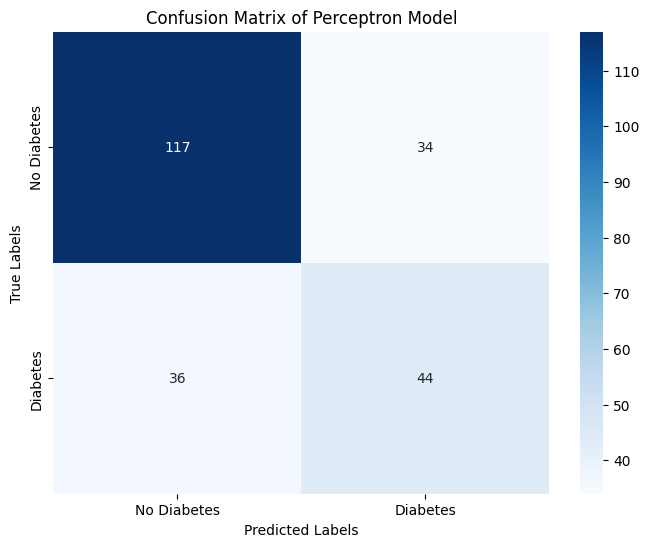

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix of Perceptron Model')
plt.show()
